In [1]:

import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

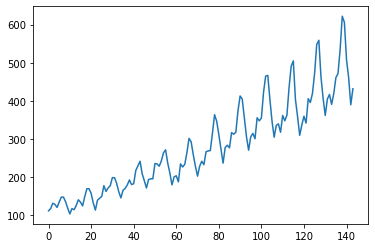

In [2]:
dataframe = read_csv('AirPassengers.csv', usecols=[1])
plt.plot(dataframe)

In [3]:
dataset = dataframe.values
dataset = dataset.astype('float32')

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
dataset = scaler.fit_transform(dataset)

In [5]:
train_size = int(len(dataset) * 0.66)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [6]:
from keras.preprocessing.sequence import TimeseriesGenerator # Generates batches for sequence data
seq_size = length =  20 
batch_size = 1
train_generator = TimeseriesGenerator(train,train,length=length,batch_size=batch_size)
print("Total number of samples in the original training data = ", len(train)) 
print("Total number of samples in the generated data = ", len(train_generator)) 

Total number of samples in the original training data =  95
Total number of samples in the generated data =  75


In [7]:
validation_generator = TimeseriesGenerator(test, test, length=length ,batch_size=batch_size)

In [8]:
num_features = 1

In [15]:
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(length, num_features)))
model.add(LSTM(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 20, 64)            16896     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit_generator(generator=train_generator, verbose=2, epochs=100, validation_data=validation_generator)

Epoch 1/100


C:\Users\jpolo\AppData\Local\Temp\ipykernel_3624\416170021.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=train_generator, verbose=2, epochs=100, validation_data=validation_generator)


75/75 - 2s - loss: 0.0203 - val_loss: 0.0289 - 2s/epoch - 28ms/step
Epoch 2/100
75/75 - 0s - loss: 0.0066 - val_loss: 0.0274 - 471ms/epoch - 6ms/step
Epoch 3/100
75/75 - 0s - loss: 0.0062 - val_loss: 0.0357 - 487ms/epoch - 6ms/step
Epoch 4/100
75/75 - 1s - loss: 0.0058 - val_loss: 0.0310 - 502ms/epoch - 7ms/step
Epoch 5/100
75/75 - 0s - loss: 0.0096 - val_loss: 0.0229 - 477ms/epoch - 6ms/step
Epoch 6/100
75/75 - 1s - loss: 0.0054 - val_loss: 0.0329 - 502ms/epoch - 7ms/step
Epoch 7/100
75/75 - 0s - loss: 0.0065 - val_loss: 0.0227 - 424ms/epoch - 6ms/step
Epoch 8/100
75/75 - 0s - loss: 0.0081 - val_loss: 0.0271 - 424ms/epoch - 6ms/step
Epoch 9/100
75/75 - 0s - loss: 0.0059 - val_loss: 0.0235 - 486ms/epoch - 6ms/step
Epoch 10/100
75/75 - 1s - loss: 0.0059 - val_loss: 0.0239 - 502ms/epoch - 7ms/step
Epoch 11/100
75/75 - 1s - loss: 0.0060 - val_loss: 0.0242 - 518ms/epoch - 7ms/step
Epoch 12/100
75/75 - 0s - loss: 0.0055 - val_loss: 0.0280 - 455ms/epoch - 6ms/step
Epoch 13/100
75/75 - 0s - l

Epoch 100/100
75/75 - 0s - loss: 9.3293e-04 - val_loss: 0.0228 - 437ms/epoch - 6ms/step


In [17]:
trainPredict = model.predict(train_generator)
testPredict = model.predict(validation_generator)

trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform(train)
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform(test)


# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY_inverse[length:], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY_inverse[length:], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

29/29 [==============================] - 0s 2ms/step
Train Score: 14.73 RMSE
Test Score: 78.30 RMSE


In [18]:
# shift train predictions for plotting
#we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[length:len(trainPredict)+length, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
#testPredictPlot[len(trainPredict)+(seq_size*2)-1:len(dataset)-1, :] = testPredict
testPredictPlot[len(train)+(length)-1:len(dataset)-1, :] = testPredict

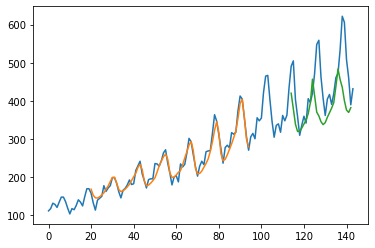

In [19]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()